In [9]:
import argparse
import pathlib
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.dates import DateFormatter
import numpy as np
from asammdf import MDF
import csv
import glob
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import os
import sys

In [66]:
csv_input_path = '/Testdata_csv'
mf4_input_path = '/Testdata_mf4'

driver = dict()
trips = dict()
max_trip_delta = 5 * 60 * 1000000000  # 5 minutes
for file in os.listdir(mf4_input_path):
    id = file.split('_')[1].split('.')[0]
    timestamp = file.split('_')[0]
    if id not in driver:
        driver[id] = []
    driver[id].append(timestamp)

for d in driver:
    driver[d].sort()
    new_trip = True
    trips[d] = []
    tlast = float(driver[d][0])
    for ts in driver[d]:
        t = float(ts)
        if new_trip:
            trips[d].append([])
            new_trip = False
        if (t - tlast) > max_trip_delta:
            tlast = t
            new_trip = True
        else:
            trips[d][-1].append(ts)
            tlast = t


In [67]:
print('=====Driver IDs=====')
ids = []
for file in os.listdir(mf4_input_path):
    id = file.split('_')[1].split('.')[0]
    if id not in ids:
        ids.append(id)

print('\n'.join(ids))
print('count: %d' % len(ids))

=====Driver IDs=====
d8b14145-ceab-488d-89ac-f689cc08f221
8c52290b-423f-4722-bf9b-1742e064bbfa
657d5398-c4d7-42e7-8d27-0e7700128bfd
d7a094a5-c7ef-44c6-88eb-907fdf7a235e
d86e7d74-cfc8-4dba-b131-23a4d66c0120
21e985c1-be16-49f7-8e14-f4a0a905aa17
count: 6


In [68]:
print('=====Print time values====')
id_to_time = dict()
for file in os.listdir(mf4_input_path):
    id = file.split('_')[1].split('.')[0]
    timestamp = file.split('_')[0]
    ts = int(timestamp)/1000000000

    if id not in id_to_time:
        id_to_time[id] = []

    id_to_time[id].append(timestamp)

# print(id_to_time)

=====Print time values====


=====Plot all trips=====


Text(0.5, 1.0, 'Trips')

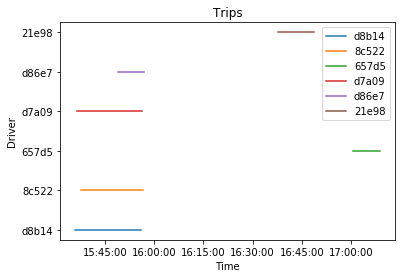

In [89]:
print('=====Plot all trips=====')
plt.figure(1)
ax = plt.subplot()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

for d in trips:
    ts = []
    for trip in trips[d]:
        for t in trip:
            tt = datetime.fromtimestamp(int(int(t)/1000000000))
            ts.append(tt)
    plt.plot(ts[:-1], np.array([d[:5]] * len(ts[:-1])), label=d[:5])

plt.legend()
plt.ylabel('Driver')
plt.xlabel('Time')
plt.title('Trips')

=====Total trip time=====
ID: d8b14, trip count: 1, total trip time: 0.383333 h
ID: 8c522, trip count: 1, total trip time: 0.366692 h
ID: 657d5, trip count: 1, total trip time: 0.183374 h
ID: d7a09, trip count: 2, total trip time: 0.183333 h
ID: d86e7, trip count: 1, total trip time: 0.183358 h
ID: 21e98, trip count: 1, total trip time: 0.233333 h


Text(0.5, 1.0, 'Total Trip Times')

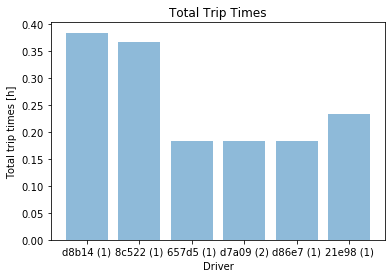

In [70]:
print('=====Total trip time=====')
total_trip_times = []
for d in trips:
    total_trip_time = 0
    for t in trips[d]:
        total_trip_time += float(t[-1]) - float(t[0])
    total_trip_time = (
        total_trip_time + 2 * 60 * 1000000000) / (60 * 60 * 1000000000)
    total_trip_times.append(total_trip_time)
    print('ID: %s, trip count: %d, total trip time: %f h' %
          (d[:5], len(trips[d]), total_trip_time))

# plot it
plt.figure(2)
y_pos = np.arange(len(trips))
x_lables = [('%s (%d)' % (t[:5], len(trips[t]))) for t in trips]
plt.bar(y_pos, np.array(total_trip_times), align='center', alpha=0.5)
plt.xticks(y_pos, x_lables)
plt.ylabel('Total trip times [h]')
plt.xlabel('Driver')
plt.title('Total Trip Times')

In [71]:
print('=====Days of trips=====')
driver = dict()
for file in os.listdir(mf4_input_path):
    id = file.split('_')[1].split('.')[0]
    timestamp = float(file.split('_')[0])
    if id not in driver:
        driver[id] = []
        driver[id].append(datetime.fromtimestamp(timestamp/1000000000).strftime('%d.%m.%Y'))

for d in driver:
    # remove duplicates
    driver[d] = list(dict.fromkeys(driver[d]))
    print('Driver: %s, Days: %s' % (d[:5], ' '.join(driver[d])))

=====Days of trips=====
Driver: d8b14, Days: 13.08.2019
Driver: 8c522, Days: 13.08.2019
Driver: 657d5, Days: 13.08.2019
Driver: d7a09, Days: 13.08.2019
Driver: d86e7, Days: 13.08.2019
Driver: 21e98, Days: 13.08.2019


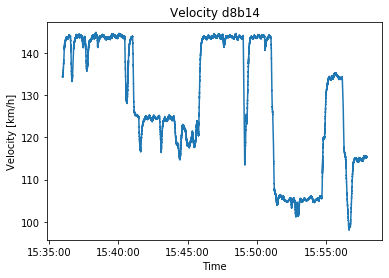

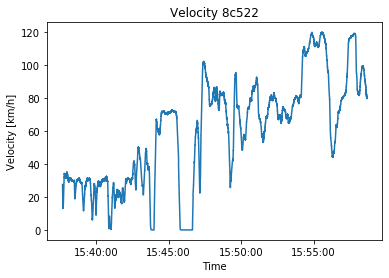

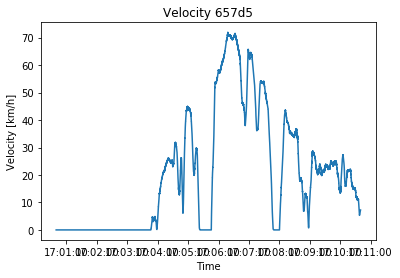

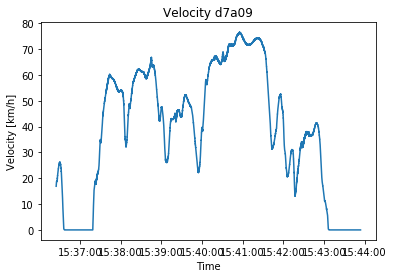

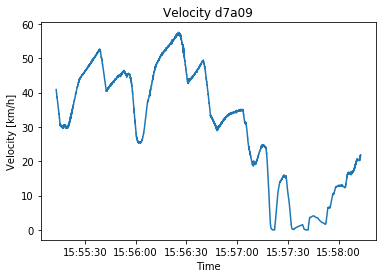

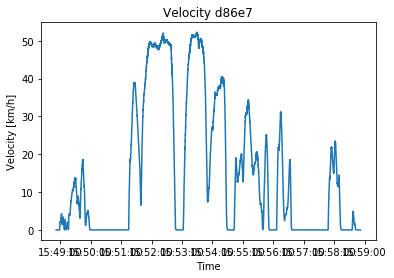

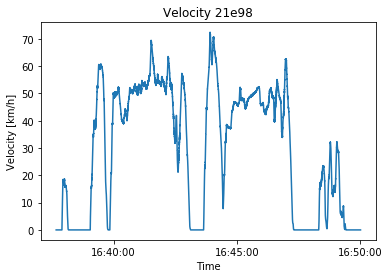

In [91]:
i = 100
for d in trips:
    for trip in trips[d]:
        data_points = []
        ts = []

        for t in trip:
            start_time = int(float(t) / 1000000000)
            file_name = os.path.join(csv_input_path, '%s_%s.ChannelGroup_*_ESP_21:.csv' % (t, d))
            file = glob.glob(file_name)[0]
            with open(file) as csv_file:
                csv_reader = list(csv.reader(csv_file, delimiter=','))
                for row in csv_reader[1:]:
                    x = start_time + float(row[0])
                    ts.append(datetime.fromtimestamp(x))
                    data_points.append(float(row[1]))

        plt.figure(i)
        ax = plt.subplot()
        ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
        plt.plot(np.array(ts), np.array(data_points))
        plt.ylabel('Velocity [km/h]')
        plt.xlabel('Time')
        plt.title('Velocity %s' % d[:5])
        i += 1

=====Signal frequences=====
MO_Gangposition: 10.02 Hz
MO_Kuppl_schalter: 10.02 Hz
FS_Luftfeuchte_rel: 2.02 Hz
FS_Temp_Sensor: 2.02 Hz
ESP_v_Signal: 49.91 Hz
MO_Drehzahl_01: 100.02 Hz
KBI_Tankfuellstand_Prozent: 1.02 Hz
AB_Gurtschloss_FA: 5.02 Hz
AB_Gurtschloss_BF: 5.02 Hz
AB_Gurtschloss_Reihe2_FA: 5.02 Hz
AB_Gurtschloss_Reihe2_MI: 5.02 Hz
AB_Gurtschloss_Reihe2_BF: 5.02 Hz
ESP_Bremsdruck: 49.73 Hz
ESP_Fahrer_bremst: 49.73 Hz
MO_Fahrpedalrohwert_01: 50.02 Hz
KBI_Aussen_Temp_gef: 1.02 Hz
KBI_Kilometerstand_2: 1.02 Hz
ESP_VL_Fahrtrichtung: 49.91 Hz
ESP_VR_Fahrtrichtung: 49.91 Hz
ESP_HL_Fahrtrichtung: 49.91 Hz
ESP_HR_Fahrtrichtung: 49.91 Hz
LWI_VZ_Lenkradw_Geschw: 100.02 Hz
LWI_Lenkradw_Geschw: 100.02 Hz
LWI_Lenkradwinkel: 100.02 Hz
LWI_VZ_Lenkradwinkel: 100.02 Hz
ESP_HL_Radgeschw_02: 99.81 Hz
ESP_HR_Radgeschw_02: 99.81 Hz
ESP_VL_Radgeschw_02: 99.81 Hz
ESP_VR_Radgeschw_02: 99.81 Hz
ESP_Querbeschleunigung: 49.71 Hz
ESP_Laengsbeschl: 49.71 Hz
ESP_Gierrate: 49.71 Hz
ESP_VZ_Gierrate: 49.71 Hz
B

([<matplotlib.axis.XTick at 0x7f8d1d1ba4a8>,
 <a list of 46 Text xticklabel objects>)

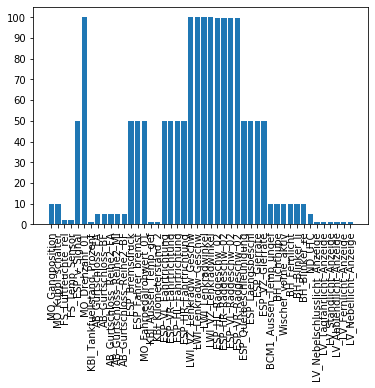

In [75]:
print('=====Signal frequences=====')
file = os.listdir(mf4_input_path)[0]
mdf_file = MDF(os.path.join(mf4_input_path, file))
signals = mdf_file.iter_channels(skip_master=True)
sf = dict()
for signal in signals:
    f = len(signal.timestamps) / (signal.timestamps[-1] - signal.timestamps[0])
    sf[signal.name[5:]] = f
    print('%s: %.2f Hz' % (signal.name[5:], f))

plt.figure(4)
plt.bar(range(len(sf)), list(sf.values()), align='center')
plt.yticks(np.arange(0, max(sf.values()), 10))
plt.xticks(range(len(sf)), list(sf.keys()), rotation='vertical')